In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import dill
import numpy as np
import random
mypath = 'controls_106'
_file = 'pickled_controls106.pkl'
filename = os.path.join(mypath, _file)


In [3]:
import numpy as np
import dill
pca = dill.load(open(filename, 'rb'))
num_steps = 500
dt = 5/2 * np.pi/num_steps
pca.dt = dt
pca.num_steps = num_steps

In [9]:
# Keep every_ith control. Increase this if you want to decrease the number of controls being considered.
every_ith = 8

def bangbang(index, x, d1, d2, d3, d4, num_steps):
    if x:
        xory = 0
    else:
        xory = 1
    dt = pca.dt
    control_hamiltonians = pca.control_hamiltonians
    controls = np.zeros((num_steps, int(len(pca.control_hamiltonians))))
    choices = (np.random.rand(100) - .5)/200 + 1
    controls[index, xory] = (1 / dt * np.pi / 2) * d1 * random.choice(choices)
    controls[-(index+1), xory] = 1 / dt * np.pi / 2 * d2 * random.choice(choices)
    controls[index, 2+xory] = 1 / dt * np.pi / 2 * d3 * random.choice(choices)
    controls[-(index+1), 2+xory] = 1 / dt * np.pi / 2 * d4 * random.choice(choices)
    return controls
random.seed(100)
np.random.seed(100)
controls = []
import itertools
for directions in list(itertools.product([-1, 1], repeat=4)):
    for x in (True, False):
        for i in range(int(num_steps/2)):
            if i % every_ith != 0:
                continue
            controls.append(bangbang(i, x, *directions, num_steps))
pca.controlset = []
pca.controlset += controls
#pca.controlset += [np.random.rand(*pca.controlset[0].shape)/1000]
pca.num_controls = len(pca.controlset)
pca.weights = None

In [10]:
import numpy
numpy.set_printoptions(threshold=numpy.nan)
indices = [(0, 0), (24, 0), (16,0), (8,0)]

In [145]:
from brokenaxes import brokenaxes
import matplotlib.pyplot as plt
def tophats(controls):
    n=18
    plt.figure(figsize=(10, 5))
    bax = brokenaxes(xlims=((0, n), (500-n, 500)))#, ylims=((-1, .7), (.79, 1)), hspace=.05)
    for j, control in enumerate(controls):
        times = list(range(len(control) + 1))
        points = []
        xpoints = [times[0]]
        for i, point in enumerate(control):
            points.append(point)
            points.append(point)
            xpoints.append(times[i+1])
            xpoints.append(times[i+1])
        xpoints = xpoints[:-1]
        bax.plot(xpoints, points, label=r'$\sigma_x^{}$'.format(j+1), drawstyle='steps', linestyle=['-', '--'][j])
        fontsize = 15
        plt.ylabel("Control Amplitude", labelpad=20, fontsize=fontsize)
        plt.xlabel("Timestep", labelpad=20, fontsize=fontsize)

        for ax in bax.fig.get_axes():
            ax.tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False) # labels along the bottom edge are off
            ax.tick_params(
                axis='y',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,
                left=False,
                right=False,
                labelbottom=False,
                labelleft=False) # labels along the bottom edge are off
    bax.legend(loc=4, prop={'size': fontsize})
    #plt.text(.08, 0.5, "Diamond Norm", va='center', rotation='vertical', fontsize=fontsize)
    #plt.xlabel("Detuning", fontsize=fontsize)
    return bax
    #    plt.tight_layout()

In [146]:
cs = [pca.controlset[1::32][i[0]].T[i[1]] for i in indices]

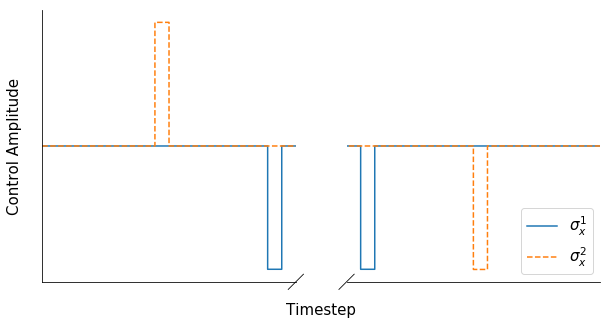

In [147]:
bax = tophats([pca.controlset[2].T[0], cs[2]])

TypeError: object of type 'numpy.float64' has no len()

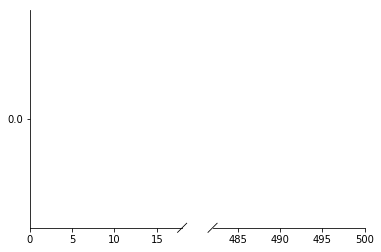

In [106]:
bax = tophats(cs[1])

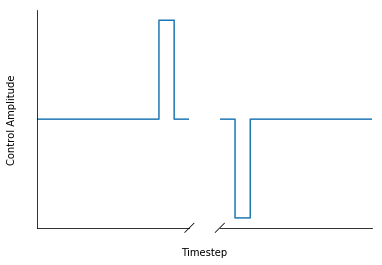

In [41]:
bax = tophats(cs[2])

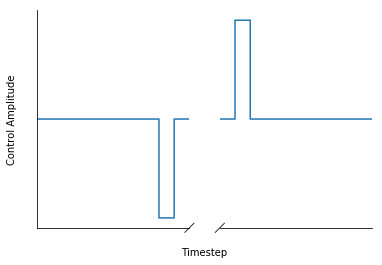

In [42]:
bax = tophats(cs[3])

In [550]:
bax.fig.get_axes()

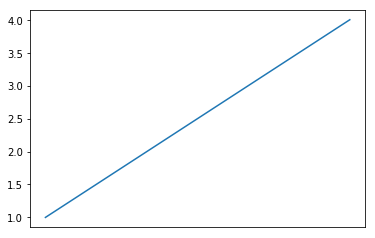

In [551]:
plt.plot([1,2,3,4], [1,2,3,4])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off


In [6]:
len(pca.controlset)

1024

In [7]:
from convex import all_derivs
derivs = all_derivs(pca.controlset, pca.target_operator, pca.control_hamiltonians, pca.ambient_hamiltonian, pca.dt, 1)
#derivs[1] = [np.delete(d, 2, 0) for d in derivs[1]]

Control 0 derivative.
Control 1 derivative.
Control 2 derivative.
Control 3 derivative.
Control 4 derivative.
Control 5 derivative.
Control 6 derivative.
Control 7 derivative.
Control 8 derivative.
Control 9 derivative.
Control 10 derivative.
Control 11 derivative.
Control 12 derivative.
Control 13 derivative.
Control 14 derivative.
Control 15 derivative.
Control 16 derivative.
Control 17 derivative.
Control 18 derivative.
Control 19 derivative.
Control 20 derivative.
Control 21 derivative.
Control 22 derivative.
Control 23 derivative.
Control 24 derivative.
Control 25 derivative.
Control 26 derivative.
Control 27 derivative.
Control 28 derivative.
Control 29 derivative.
Control 30 derivative.
Control 31 derivative.
Control 32 derivative.
Control 33 derivative.
Control 34 derivative.
Control 35 derivative.
Control 36 derivative.
Control 37 derivative.
Control 38 derivative.
Control 39 derivative.
Control 40 derivative.
Control 41 derivative.
Control 42 derivative.
Control 43 derivative

Control 347 derivative.
Control 348 derivative.
Control 349 derivative.
Control 350 derivative.
Control 351 derivative.
Control 352 derivative.
Control 353 derivative.
Control 354 derivative.
Control 355 derivative.
Control 356 derivative.
Control 357 derivative.
Control 358 derivative.
Control 359 derivative.
Control 360 derivative.
Control 361 derivative.
Control 362 derivative.
Control 363 derivative.
Control 364 derivative.
Control 365 derivative.
Control 366 derivative.
Control 367 derivative.
Control 368 derivative.
Control 369 derivative.
Control 370 derivative.
Control 371 derivative.
Control 372 derivative.
Control 373 derivative.
Control 374 derivative.
Control 375 derivative.
Control 376 derivative.
Control 377 derivative.
Control 378 derivative.
Control 379 derivative.
Control 380 derivative.
Control 381 derivative.
Control 382 derivative.
Control 383 derivative.
Control 384 derivative.
Control 385 derivative.
Control 386 derivative.
Control 387 derivative.
Control 388 deri

Control 690 derivative.
Control 691 derivative.
Control 692 derivative.
Control 693 derivative.
Control 694 derivative.
Control 695 derivative.
Control 696 derivative.
Control 697 derivative.
Control 698 derivative.
Control 699 derivative.
Control 700 derivative.
Control 701 derivative.
Control 702 derivative.
Control 703 derivative.
Control 704 derivative.
Control 705 derivative.
Control 706 derivative.
Control 707 derivative.
Control 708 derivative.
Control 709 derivative.
Control 710 derivative.
Control 711 derivative.
Control 712 derivative.
Control 713 derivative.
Control 714 derivative.
Control 715 derivative.
Control 716 derivative.
Control 717 derivative.
Control 718 derivative.
Control 719 derivative.
Control 720 derivative.
Control 721 derivative.
Control 722 derivative.
Control 723 derivative.
Control 724 derivative.
Control 725 derivative.
Control 726 derivative.
Control 727 derivative.
Control 728 derivative.
Control 729 derivative.
Control 730 derivative.
Control 731 deri

Control 7 derivative.
Control 8 derivative.
Control 9 derivative.
Control 10 derivative.
Control 11 derivative.
Control 12 derivative.
Control 13 derivative.
Control 14 derivative.
Control 15 derivative.
Control 16 derivative.
Control 17 derivative.
Control 18 derivative.
Control 19 derivative.
Control 20 derivative.
Control 21 derivative.
Control 22 derivative.
Control 23 derivative.
Control 24 derivative.
Control 25 derivative.
Control 26 derivative.
Control 27 derivative.
Control 28 derivative.
Control 29 derivative.
Control 30 derivative.
Control 31 derivative.
Control 32 derivative.
Control 33 derivative.
Control 34 derivative.
Control 35 derivative.
Control 36 derivative.
Control 37 derivative.
Control 38 derivative.
Control 39 derivative.
Control 40 derivative.
Control 41 derivative.
Control 42 derivative.
Control 43 derivative.
Control 44 derivative.
Control 45 derivative.
Control 46 derivative.
Control 47 derivative.
Control 48 derivative.
Control 49 derivative.
Control 50 der

Control 353 derivative.
Control 354 derivative.
Control 355 derivative.
Control 356 derivative.
Control 357 derivative.
Control 358 derivative.
Control 359 derivative.
Control 360 derivative.
Control 361 derivative.
Control 362 derivative.
Control 363 derivative.
Control 364 derivative.
Control 365 derivative.
Control 366 derivative.
Control 367 derivative.
Control 368 derivative.
Control 369 derivative.
Control 370 derivative.
Control 371 derivative.
Control 372 derivative.
Control 373 derivative.
Control 374 derivative.
Control 375 derivative.
Control 376 derivative.
Control 377 derivative.
Control 378 derivative.
Control 379 derivative.
Control 380 derivative.
Control 381 derivative.
Control 382 derivative.
Control 383 derivative.
Control 384 derivative.
Control 385 derivative.
Control 386 derivative.
Control 387 derivative.
Control 388 derivative.
Control 389 derivative.
Control 390 derivative.
Control 391 derivative.
Control 392 derivative.
Control 393 derivative.
Control 394 deri

Control 695 derivative.
Control 696 derivative.
Control 697 derivative.
Control 698 derivative.
Control 699 derivative.
Control 700 derivative.
Control 701 derivative.
Control 702 derivative.
Control 703 derivative.
Control 704 derivative.
Control 705 derivative.
Control 706 derivative.
Control 707 derivative.
Control 708 derivative.
Control 709 derivative.
Control 710 derivative.
Control 711 derivative.
Control 712 derivative.
Control 713 derivative.
Control 714 derivative.
Control 715 derivative.
Control 716 derivative.
Control 717 derivative.
Control 718 derivative.
Control 719 derivative.
Control 720 derivative.
Control 721 derivative.
Control 722 derivative.
Control 723 derivative.
Control 724 derivative.
Control 725 derivative.
Control 726 derivative.
Control 727 derivative.
Control 728 derivative.
Control 729 derivative.
Control 730 derivative.
Control 731 derivative.
Control 732 derivative.
Control 733 derivative.
Control 734 derivative.
Control 735 derivative.
Control 736 deri

In [8]:
# Confirm that the controls are reasonably good.

In [9]:
import scipy
[np.trace(scipy.linalg.expm(-1.j*d.reshape(4,4)))/4 for d in derivs[0]]

[(0.9999788942167753-2.927345865710862e-18j),
 (0.9999832368841989-2.656295322589486e-18j),
 (0.9999899325190604-3.198396408832238e-18j),
 (0.9999838966943186-2.656295322589486e-18j),
 (0.9999796752700737-3.848917712323541e-18j),
 (0.9999832669237996-9.75781955236954e-19j),
 (0.9999869612502726-3.74049749507499e-18j),
 (0.9999926520462924-3.415236843329339e-18j),
 (0.9999906417034072-2.439454888092385e-18j),
 (0.9999898952055125-3.2526065174565133e-18j),
 (0.999989395872492-1.463672932855431e-18j),
 (0.9999748269639511-3.7947076036992655e-19j),
 (0.9999893074789525-6.505213034913027e-19j),
 (0.9999912757598515-2.656295322589486e-18j),
 (0.9999775395794861-3.957337929572091e-18j),
 (0.999980684585853-2.5478751053409354e-18j),
 (0.9999863091989094-1.8431436932253575e-18j),
 (0.9999917273542166-3.415236843329339e-18j),
 (0.9999838147954965-3.3068166260807885e-18j),
 (0.9999734512697362-5.421010862427522e-20j),
 (0.9999860153200899-2.3310346708438345e-18j),
 (0.9999724738014608-3.415236843

In [10]:
import dill
_file = open('derivs', 'wb')
dill.dump(derivs, _file)

In [11]:
import matplotlib.pyplot as plt
def hist_and_support(weights, num=10):
    plt.hist(weights)
    np.argmax(weights)
    top_idx = np.argsort(np.array(weights).T)[0][-num:]
    top_values = [weights[i] for i in top_idx]
    print(f"SUPPORT:{np.sum(top_values)}")
    print(f"NUM CONTROLS: {num}")
    return top_idx, np.sum(top_values)

In [12]:
from pauli_channel_approximation import PCA

/home/anthony/repos/decorrelating_errors/code/pauli_channel_approximation.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/anthony/.pyenv/versions/3.6.3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/anthony/.pyenv/versions/3.6.3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/anthony/.pyenv/versions/3.6.3/envs/personal/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/anthony/.pyenv/versions/3.6.3/envs/personal/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/anthon

In [13]:
from convex import optimal_weights
pca.weights_0 = optimal_weights(derivs[:1])

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 2115            
  Cones                  : 2               
  Scalar variables       : 1060            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 13              
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 2115            
  Cones               

In [14]:
num_weights = len(pca.controlset)

SUPPORT:0.9999999996297273
NUM CONTROLS: 1024


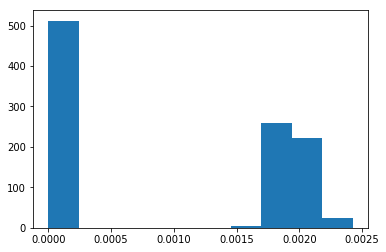

In [15]:
idx0, supp = hist_and_support(pca.weights_0, num_weights)

In [16]:
from convex import optimal_weights
pca.weights = optimal_weights(derivs)

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 2243            
  Cones                  : 2               
  Scalar variables       : 1188            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 13              
Presolve terminated. Time: 0.03    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 2243            
  Cones               

SUPPORT:0.9999999964382768
NUM CONTROLS: 1024


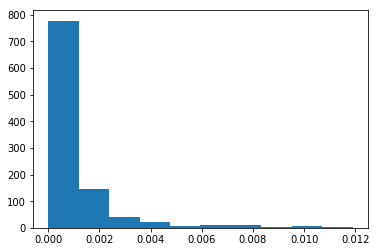

In [17]:
idx1, supp = hist_and_support(pca.weights, num_weights)

In [18]:
pca0 = dill.load(open(filename, 'rb'))
pca0.controlset = controls
subweights =  np.array(pca.weights_0)[idx0]
pca0.controlset = []
pca0.controlset += controls
pca0.controlset += [np.zeros(controls[0].shape)]
pca0.controlset = np.array(pca0.controlset)[idx0]
pca0.weights = None


pca0.num_controls = len(pca0.controlset)
pca0.probs = list(np.array(subweights.T/sum(subweights)).T)

In [19]:
pca1 = dill.load(open(filename, 'rb'))
pca1.controlset = controls
subweights = np.array(pca.weights)[idx1]
pca1.controlset = []
pca1.controlset += controls
pca1.controlset += [np.zeros(controls[0].shape)]
pca1.controlset = np.array(pca1.controlset)[idx1]
pca1.weights = None


pca1.num_controls = len(pca1.controlset)
pca1.probs = list(np.array(subweights.T/sum(subweights)).T)


In [20]:
import scipy
order = 0
# Zeroth order optimized weights
print('ZEROTH ORDER: {}'.format(scipy.linalg.norm(np.matrix(np.array([d.flatten() for d in derivs[order]])[idx0]).T.dot(pca0.probs))))

ZEROTH ORDER: 5.986458144256104e-15


In [21]:
import scipy
order = 0
# Zeroth order optimized weights
print("SUM: {}".format(sum(np.matrix(np.array([d.flatten() for d in derivs[order]])[idx0]).T.dot(pca0.probs))))

SUM: [[5.61313064e-15-2.04124064e-17j]]


In [22]:
import scipy
order = 1
print('FIRST ORDER: {}'.format(scipy.linalg.norm(np.matrix(np.array([d.flatten() for d in derivs[order]])[idx0]).T.dot(pca0.probs))))

FIRST ORDER: 1.8103894948257255


In [23]:
import scipy
order = 0
# Zeroth order optimized weights
print('ZEROTH ORDER: {}'.format(scipy.linalg.norm(np.matrix(np.array([d.flatten() for d in derivs[order]])[idx1]).T.dot(pca1.probs))))

ZEROTH ORDER: 9.547202113902467e-16


In [24]:
import scipy
order = 0
# Zeroth order optimized weights
print("SUM: {}".format(sum(np.matrix(np.array([d.flatten() for d in derivs[order]])[idx1]).T.dot(pca1.probs))))

SUM: [[-1.20414204e-16-1.29887325e-16j]]


In [25]:
import scipy
order = 1
print('FIRST ORDER: {}'.format(scipy.linalg.norm(np.matrix(np.array([d.flatten() for d in derivs[order]])[idx1]).T.dot(pca1.probs))))

FIRST ORDER: 1.2254097187199142e-11


In [26]:
pca0.dt = dt
pca1.dt = dt
pca0.num_steps = num_steps
pca1.num_steps = num_steps
pca0.num_controls = len(pca0.controlset)
pca1.num_controls = len(pca1.controlset)

In [27]:
_file = 'pickled_controls106.pkl'
# Save the weighted controls
import dill
dill.dump(pca0, open('0_' + _file, 'wb'))

import dill
dill.dump(pca1, open('1_' + _file, 'wb'))

In [28]:
# Save the weighted controls
import dill
import os
import numpy as np


pca0 = dill.load(open('0_' + _file, 'rb'))
pca1 = dill.load(open('1_' + _file, 'rb'))

In [29]:
from pauli_channel_approximation import control_unitaries, error_unitary, off_diagonal_projection, adjoint
import sys
import itertools
from itertools import product
from copy import deepcopy
from functools import reduce
import numpy as np

from diamond import diamond_norm, jamiolkowski

def superoperator(unitary):

    return np.kron(unitary.conj(), unitary)

def choi_form(unitary):
    return np.matrix(jamiolkowski(superoperator(unitary)))

def diamond_distance(sopa, sopb):
    rtn = (jamiolkowski(sopa) - jamiolkowski(sopb))/2
    return diamond_norm(rtn)

def compute_diamond_norm(data):
    controlset, ambient_hamiltonian0, combo, dt, control_hamiltonians, target_operator, probs = data
    print("DOING COMBO {}".format(combo))
    sys.stdout.flush()
    fidelities = []
    projs = []
    sops = []
    controlset_unitaries = []
    d_norms = []

    for i, controls in enumerate(controlset):
        newcontrols = deepcopy(controls)
        ambient_hamiltonian = [deepcopy(ah).astype("complex") for ah in ambient_hamiltonian0]
        for cnum, value in enumerate(combo):
            cnum -= len(ambient_hamiltonian0)
            if cnum >= 0:
                newcontrols[:, cnum] = newcontrols[:, cnum] * (1 + value)
            if cnum < 0:
                if cnum == -1:
                    ambient_hamiltonian[cnum] *= 1 + float(value)
                else:
                    ambient_hamiltonian[cnum] *= float(value)
        step_unitaries = control_unitaries(ambient_hamiltonian,
                                           control_hamiltonians, newcontrols,
                                           dt)
        unitary = reduce(lambda a, b: a.dot(b), step_unitaries)
        sop = error_unitary(unitary, target_operator)
        sops.append(sop)
        print("Control {}".format(i))
        if i == 0:
            d_norms.append(diamond_distance(sop, np.eye(sop.shape[0])))
    avg_sop = reduce(lambda a, b: a + b, [prob * sops[i] for i, prob in enumerate(probs)])
    d_norms.append(diamond_distance(avg_sop, np.eye(avg_sop.shape[0])))
    return d_norms

def generate_indices(num_points, order_desired):
    num_indices = len(order_desired)
    tuples = product(range(num_points), repeat=num_indices)
    indices = [sum([num_points**(num_indices - 1 - order_desired[i]) * t[i] 
                    for i in range(num_indices)]) for t in tuples]
    return indices

In [30]:
import dill
all_results = []
base = np.logspace(-4.7, np.log(pca0.detunings[0][0])/np.log(10), 1)
values = np.concatenate([np.sort(-base),np.array([0]), base]) * 100
combinations0 = [[det, 0, 0, 0, 0, 0, 0] for det in values]
combinations1 = [[0, det, 0, 0, 0, 0, 0] for det in values]
combinations2 = [[0, 0, det, 0, 0, 0, 0] for det in values]
combinations3 = [[0, 0, 0, det, det, 0, 0] for det in values]
combinations4 = [[0, 0, 0, 0, 0, det, det] for det in values]

for j, pca in enumerate((pca0, pca1)):
    d_norms00 = []
    for i in range(len(combinations0)):
        combo = combinations0[i]
        lst = [pca.controlset, pca.ambient_hamiltonian, combo, pca.dt,
                pca.control_hamiltonians, pca.target_operator, pca.probs]
        d_norms00.append(compute_diamond_norm(lst))
        dill.dump(d_norms00, open('d_norms00_{}_{}'.format(i, j), 'wb'))
for j, pca in enumerate((pca0, pca1)):
    d_norms01 = []
    for i in range(len(combinations1)):
        combo = combinations1[i]
        lst = [pca.controlset, pca.ambient_hamiltonian, combo, pca.dt,
                pca.control_hamiltonians, pca.target_operator, pca.probs]
        d_norms01.append(compute_diamond_norm(lst))
        dill.dump(d_norms01, open('d_norms01_{}_{}'.format(i, j), 'wb'))
        
for j, pca in enumerate((pca0, pca1)):
    d_norms03 = []
    for i in range(len(combinations3)):
        combo = combinations3[i]
        lst = [pca.controlset, pca.ambient_hamiltonian, combo, pca.dt,
                pca.control_hamiltonians, pca.target_operator, pca.probs]
        d_norms03.append(compute_diamond_norm(lst))
        dill.dump(d_norms03, open('d_norms03_{}_{}'.format(i, j), 'wb'))
for j, pca in enumerate((pca0, pca1)):
    d_norms04 = []
    for i in range(len(combinations4)):
        combo = combinations4[i]
        lst = [pca.controlset, pca.ambient_hamiltonian, combo, pca.dt,
                pca.control_hamiltonians, pca.target_operator, pca.probs]
        d_norms04.append(compute_diamond_norm(lst))
        dill.dump(d_norms04, open('d_norms04_{}_{}'.format(i, j), 'wb'))

DOING COMBO [-0.0019952623149688785, 0, 0, 0, 0, 0, 0]
Control 0
Control 1
Control 2
Control 3
Control 4
Control 5
Control 6
Control 7
Control 8
Control 9
Control 10
Control 11
Control 12
Control 13
Control 14
Control 15
Control 16
Control 17
Control 18
Control 19
Control 20
Control 21
Control 22
Control 23
Control 24
Control 25
Control 26
Control 27
Control 28
Control 29
Control 30
Control 31
Control 32
Control 33
Control 34
Control 35
Control 36
Control 37
Control 38
Control 39
Control 40
Control 41
Control 42
Control 43
Control 44
Control 45
Control 46
Control 47
Control 48
Control 49
Control 50
Control 51
Control 52
Control 53
Control 54
Control 55
Control 56
Control 57
Control 58
Control 59
Control 60
Control 61
Control 62
Control 63
Control 64
Control 65
Control 66
Control 67
Control 68
Control 69
Control 70
Control 71
Control 72
Control 73
Control 74
Control 75
Control 76
Control 77
Control 78
Control 79
Control 80
Control 81
Control 82
Control 83
Control 84
Control 85
Control 8

Control 688
Control 689
Control 690
Control 691
Control 692
Control 693
Control 694
Control 695
Control 696
Control 697
Control 698
Control 699
Control 700
Control 701
Control 702
Control 703
Control 704
Control 705
Control 706
Control 707
Control 708
Control 709
Control 710
Control 711
Control 712
Control 713
Control 714
Control 715
Control 716
Control 717
Control 718
Control 719
Control 720
Control 721
Control 722
Control 723
Control 724
Control 725
Control 726
Control 727
Control 728
Control 729
Control 730
Control 731
Control 732
Control 733
Control 734
Control 735
Control 736
Control 737
Control 738
Control 739
Control 740
Control 741
Control 742
Control 743
Control 744
Control 745
Control 746
Control 747
Control 748
Control 749
Control 750
Control 751
Control 752
Control 753
Control 754
Control 755
Control 756
Control 757
Control 758
Control 759
Control 760
Control 761
Control 762
Control 763
Control 764
Control 765
Control 766
Control 767
Control 768
Control 769
Control 770
Cont

Control 351
Control 352
Control 353
Control 354
Control 355
Control 356
Control 357
Control 358
Control 359
Control 360
Control 361
Control 362
Control 363
Control 364
Control 365
Control 366
Control 367
Control 368
Control 369
Control 370
Control 371
Control 372
Control 373
Control 374
Control 375
Control 376
Control 377
Control 378
Control 379
Control 380
Control 381
Control 382
Control 383
Control 384
Control 385
Control 386
Control 387
Control 388
Control 389
Control 390
Control 391
Control 392
Control 393
Control 394
Control 395
Control 396
Control 397
Control 398
Control 399
Control 400
Control 401
Control 402
Control 403
Control 404
Control 405
Control 406
Control 407
Control 408
Control 409
Control 410
Control 411
Control 412
Control 413
Control 414
Control 415
Control 416
Control 417
Control 418
Control 419
Control 420
Control 421
Control 422
Control 423
Control 424
Control 425
Control 426
Control 427
Control 428
Control 429
Control 430
Control 431
Control 432
Control 433
Cont

Control 5
Control 6
Control 7
Control 8
Control 9
Control 10
Control 11
Control 12
Control 13
Control 14
Control 15
Control 16
Control 17
Control 18
Control 19
Control 20
Control 21
Control 22
Control 23
Control 24
Control 25
Control 26
Control 27
Control 28
Control 29
Control 30
Control 31
Control 32
Control 33
Control 34
Control 35
Control 36
Control 37
Control 38
Control 39
Control 40
Control 41
Control 42
Control 43
Control 44
Control 45
Control 46
Control 47
Control 48
Control 49
Control 50
Control 51
Control 52
Control 53
Control 54
Control 55
Control 56
Control 57
Control 58
Control 59
Control 60
Control 61
Control 62
Control 63
Control 64
Control 65
Control 66
Control 67
Control 68
Control 69
Control 70
Control 71
Control 72
Control 73
Control 74
Control 75
Control 76
Control 77
Control 78
Control 79
Control 80
Control 81
Control 82
Control 83
Control 84
Control 85
Control 86
Control 87
Control 88
Control 89
Control 90
Control 91
Control 92
Control 93
Control 94
Control 95
Cont

Control 697
Control 698
Control 699
Control 700
Control 701
Control 702
Control 703
Control 704
Control 705
Control 706
Control 707
Control 708
Control 709
Control 710
Control 711
Control 712
Control 713
Control 714
Control 715
Control 716
Control 717
Control 718
Control 719
Control 720
Control 721
Control 722
Control 723
Control 724
Control 725
Control 726
Control 727
Control 728
Control 729
Control 730
Control 731
Control 732
Control 733
Control 734
Control 735
Control 736
Control 737
Control 738
Control 739
Control 740
Control 741
Control 742
Control 743
Control 744
Control 745
Control 746
Control 747
Control 748
Control 749
Control 750
Control 751
Control 752
Control 753
Control 754
Control 755
Control 756
Control 757
Control 758
Control 759
Control 760
Control 761
Control 762
Control 763
Control 764
Control 765
Control 766
Control 767
Control 768
Control 769
Control 770
Control 771
Control 772
Control 773
Control 774
Control 775
Control 776
Control 777
Control 778
Control 779
Cont

Control 359
Control 360
Control 361
Control 362
Control 363
Control 364
Control 365
Control 366
Control 367
Control 368
Control 369
Control 370
Control 371
Control 372
Control 373
Control 374
Control 375
Control 376
Control 377
Control 378
Control 379
Control 380
Control 381
Control 382
Control 383
Control 384
Control 385
Control 386
Control 387
Control 388
Control 389
Control 390
Control 391
Control 392
Control 393
Control 394
Control 395
Control 396
Control 397
Control 398
Control 399
Control 400
Control 401
Control 402
Control 403
Control 404
Control 405
Control 406
Control 407
Control 408
Control 409
Control 410
Control 411
Control 412
Control 413
Control 414
Control 415
Control 416
Control 417
Control 418
Control 419
Control 420
Control 421
Control 422
Control 423
Control 424
Control 425
Control 426
Control 427
Control 428
Control 429
Control 430
Control 431
Control 432
Control 433
Control 434
Control 435
Control 436
Control 437
Control 438
Control 439
Control 440
Control 441
Cont

Control 15
Control 16
Control 17
Control 18
Control 19
Control 20
Control 21
Control 22
Control 23
Control 24
Control 25
Control 26
Control 27
Control 28
Control 29
Control 30
Control 31
Control 32
Control 33
Control 34
Control 35
Control 36
Control 37
Control 38
Control 39
Control 40
Control 41
Control 42
Control 43
Control 44
Control 45
Control 46
Control 47
Control 48
Control 49
Control 50
Control 51
Control 52
Control 53
Control 54
Control 55
Control 56
Control 57
Control 58
Control 59
Control 60
Control 61
Control 62
Control 63
Control 64
Control 65
Control 66
Control 67
Control 68
Control 69
Control 70
Control 71
Control 72
Control 73
Control 74
Control 75
Control 76
Control 77
Control 78
Control 79
Control 80
Control 81
Control 82
Control 83
Control 84
Control 85
Control 86
Control 87
Control 88
Control 89
Control 90
Control 91
Control 92
Control 93
Control 94
Control 95
Control 96
Control 97
Control 98
Control 99
Control 100
Control 101
Control 102
Control 103
Control 104
Contr

Control 706
Control 707
Control 708
Control 709
Control 710
Control 711
Control 712
Control 713
Control 714
Control 715
Control 716
Control 717
Control 718
Control 719
Control 720
Control 721
Control 722
Control 723
Control 724
Control 725
Control 726
Control 727
Control 728
Control 729
Control 730
Control 731
Control 732
Control 733
Control 734
Control 735
Control 736
Control 737
Control 738
Control 739
Control 740
Control 741
Control 742
Control 743
Control 744
Control 745
Control 746
Control 747
Control 748
Control 749
Control 750
Control 751
Control 752
Control 753
Control 754
Control 755
Control 756
Control 757
Control 758
Control 759
Control 760
Control 761
Control 762
Control 763
Control 764
Control 765
Control 766
Control 767
Control 768
Control 769
Control 770
Control 771
Control 772
Control 773
Control 774
Control 775
Control 776
Control 777
Control 778
Control 779
Control 780
Control 781
Control 782
Control 783
Control 784
Control 785
Control 786
Control 787
Control 788
Cont

Control 369
Control 370
Control 371
Control 372
Control 373
Control 374
Control 375
Control 376
Control 377
Control 378
Control 379
Control 380
Control 381
Control 382
Control 383
Control 384
Control 385
Control 386
Control 387
Control 388
Control 389
Control 390
Control 391
Control 392
Control 393
Control 394
Control 395
Control 396
Control 397
Control 398
Control 399
Control 400
Control 401
Control 402
Control 403
Control 404
Control 405
Control 406
Control 407
Control 408
Control 409
Control 410
Control 411
Control 412
Control 413
Control 414
Control 415
Control 416
Control 417
Control 418
Control 419
Control 420
Control 421
Control 422
Control 423
Control 424
Control 425
Control 426
Control 427
Control 428
Control 429
Control 430
Control 431
Control 432
Control 433
Control 434
Control 435
Control 436
Control 437
Control 438
Control 439
Control 440
Control 441
Control 442
Control 443
Control 444
Control 445
Control 446
Control 447
Control 448
Control 449
Control 450
Control 451
Cont

Control 24
Control 25
Control 26
Control 27
Control 28
Control 29
Control 30
Control 31
Control 32
Control 33
Control 34
Control 35
Control 36
Control 37
Control 38
Control 39
Control 40
Control 41
Control 42
Control 43
Control 44
Control 45
Control 46
Control 47
Control 48
Control 49
Control 50
Control 51
Control 52
Control 53
Control 54
Control 55
Control 56
Control 57
Control 58
Control 59
Control 60
Control 61
Control 62
Control 63
Control 64
Control 65
Control 66
Control 67
Control 68
Control 69
Control 70
Control 71
Control 72
Control 73
Control 74
Control 75
Control 76
Control 77
Control 78
Control 79
Control 80
Control 81
Control 82
Control 83
Control 84
Control 85
Control 86
Control 87
Control 88
Control 89
Control 90
Control 91
Control 92
Control 93
Control 94
Control 95
Control 96
Control 97
Control 98
Control 99
Control 100
Control 101
Control 102
Control 103
Control 104
Control 105
Control 106
Control 107
Control 108
Control 109
Control 110
Control 111
Control 112
Control 

Control 714
Control 715
Control 716
Control 717
Control 718
Control 719
Control 720
Control 721
Control 722
Control 723
Control 724
Control 725
Control 726
Control 727
Control 728
Control 729
Control 730
Control 731
Control 732
Control 733
Control 734
Control 735
Control 736
Control 737
Control 738
Control 739
Control 740
Control 741
Control 742
Control 743
Control 744
Control 745
Control 746
Control 747
Control 748
Control 749
Control 750
Control 751
Control 752
Control 753
Control 754
Control 755
Control 756
Control 757
Control 758
Control 759
Control 760
Control 761
Control 762
Control 763
Control 764
Control 765
Control 766
Control 767
Control 768
Control 769
Control 770
Control 771
Control 772
Control 773
Control 774
Control 775
Control 776
Control 777
Control 778
Control 779
Control 780
Control 781
Control 782
Control 783
Control 784
Control 785
Control 786
Control 787
Control 788
Control 789
Control 790
Control 791
Control 792
Control 793
Control 794
Control 795
Control 796
Cont

Control 378
Control 379
Control 380
Control 381
Control 382
Control 383
Control 384
Control 385
Control 386
Control 387
Control 388
Control 389
Control 390
Control 391
Control 392
Control 393
Control 394
Control 395
Control 396
Control 397
Control 398
Control 399
Control 400
Control 401
Control 402
Control 403
Control 404
Control 405
Control 406
Control 407
Control 408
Control 409
Control 410
Control 411
Control 412
Control 413
Control 414
Control 415
Control 416
Control 417
Control 418
Control 419
Control 420
Control 421
Control 422
Control 423
Control 424
Control 425
Control 426
Control 427
Control 428
Control 429
Control 430
Control 431
Control 432
Control 433
Control 434
Control 435
Control 436
Control 437
Control 438
Control 439
Control 440
Control 441
Control 442
Control 443
Control 444
Control 445
Control 446
Control 447
Control 448
Control 449
Control 450
Control 451
Control 452
Control 453
Control 454
Control 455
Control 456
Control 457
Control 458
Control 459
Control 460
Cont

Control 35
Control 36
Control 37
Control 38
Control 39
Control 40
Control 41
Control 42
Control 43
Control 44
Control 45
Control 46
Control 47
Control 48
Control 49
Control 50
Control 51
Control 52
Control 53
Control 54
Control 55
Control 56
Control 57
Control 58
Control 59
Control 60
Control 61
Control 62
Control 63
Control 64
Control 65
Control 66
Control 67
Control 68
Control 69
Control 70
Control 71
Control 72
Control 73
Control 74
Control 75
Control 76
Control 77
Control 78
Control 79
Control 80
Control 81
Control 82
Control 83
Control 84
Control 85
Control 86
Control 87
Control 88
Control 89
Control 90
Control 91
Control 92
Control 93
Control 94
Control 95
Control 96
Control 97
Control 98
Control 99
Control 100
Control 101
Control 102
Control 103
Control 104
Control 105
Control 106
Control 107
Control 108
Control 109
Control 110
Control 111
Control 112
Control 113
Control 114
Control 115
Control 116
Control 117
Control 118
Control 119
Control 120
Control 121
Control 122
Control 1

Control 724
Control 725
Control 726
Control 727
Control 728
Control 729
Control 730
Control 731
Control 732
Control 733
Control 734
Control 735
Control 736
Control 737
Control 738
Control 739
Control 740
Control 741
Control 742
Control 743
Control 744
Control 745
Control 746
Control 747
Control 748
Control 749
Control 750
Control 751
Control 752
Control 753
Control 754
Control 755
Control 756
Control 757
Control 758
Control 759
Control 760
Control 761
Control 762
Control 763
Control 764
Control 765
Control 766
Control 767
Control 768
Control 769
Control 770
Control 771
Control 772
Control 773
Control 774
Control 775
Control 776
Control 777
Control 778
Control 779
Control 780
Control 781
Control 782
Control 783
Control 784
Control 785
Control 786
Control 787
Control 788
Control 789
Control 790
Control 791
Control 792
Control 793
Control 794
Control 795
Control 796
Control 797
Control 798
Control 799
Control 800
Control 801
Control 802
Control 803
Control 804
Control 805
Control 806
Cont

Control 387
Control 388
Control 389
Control 390
Control 391
Control 392
Control 393
Control 394
Control 395
Control 396
Control 397
Control 398
Control 399
Control 400
Control 401
Control 402
Control 403
Control 404
Control 405
Control 406
Control 407
Control 408
Control 409
Control 410
Control 411
Control 412
Control 413
Control 414
Control 415
Control 416
Control 417
Control 418
Control 419
Control 420
Control 421
Control 422
Control 423
Control 424
Control 425
Control 426
Control 427
Control 428
Control 429
Control 430
Control 431
Control 432
Control 433
Control 434
Control 435
Control 436
Control 437
Control 438
Control 439
Control 440
Control 441
Control 442
Control 443
Control 444
Control 445
Control 446
Control 447
Control 448
Control 449
Control 450
Control 451
Control 452
Control 453
Control 454
Control 455
Control 456
Control 457
Control 458
Control 459
Control 460
Control 461
Control 462
Control 463
Control 464
Control 465
Control 466
Control 467
Control 468
Control 469
Cont

Control 46
Control 47
Control 48
Control 49
Control 50
Control 51
Control 52
Control 53
Control 54
Control 55
Control 56
Control 57
Control 58
Control 59
Control 60
Control 61
Control 62
Control 63
Control 64
Control 65
Control 66
Control 67
Control 68
Control 69
Control 70
Control 71
Control 72
Control 73
Control 74
Control 75
Control 76
Control 77
Control 78
Control 79
Control 80
Control 81
Control 82
Control 83
Control 84
Control 85
Control 86
Control 87
Control 88
Control 89
Control 90
Control 91
Control 92
Control 93
Control 94
Control 95
Control 96
Control 97
Control 98
Control 99
Control 100
Control 101
Control 102
Control 103
Control 104
Control 105
Control 106
Control 107
Control 108
Control 109
Control 110
Control 111
Control 112
Control 113
Control 114
Control 115
Control 116
Control 117
Control 118
Control 119
Control 120
Control 121
Control 122
Control 123
Control 124
Control 125
Control 126
Control 127
Control 128
Control 129
Control 130
Control 131
Control 132
Control 13

Control 734
Control 735
Control 736
Control 737
Control 738
Control 739
Control 740
Control 741
Control 742
Control 743
Control 744
Control 745
Control 746
Control 747
Control 748
Control 749
Control 750
Control 751
Control 752
Control 753
Control 754
Control 755
Control 756
Control 757
Control 758
Control 759
Control 760
Control 761
Control 762
Control 763
Control 764
Control 765
Control 766
Control 767
Control 768
Control 769
Control 770
Control 771
Control 772
Control 773
Control 774
Control 775
Control 776
Control 777
Control 778
Control 779
Control 780
Control 781
Control 782
Control 783
Control 784
Control 785
Control 786
Control 787
Control 788
Control 789
Control 790
Control 791
Control 792
Control 793
Control 794
Control 795
Control 796
Control 797
Control 798
Control 799
Control 800
Control 801
Control 802
Control 803
Control 804
Control 805
Control 806
Control 807
Control 808
Control 809
Control 810
Control 811
Control 812
Control 813
Control 814
Control 815
Control 816
Cont

Control 396
Control 397
Control 398
Control 399
Control 400
Control 401
Control 402
Control 403
Control 404
Control 405
Control 406
Control 407
Control 408
Control 409
Control 410
Control 411
Control 412
Control 413
Control 414
Control 415
Control 416
Control 417
Control 418
Control 419
Control 420
Control 421
Control 422
Control 423
Control 424
Control 425
Control 426
Control 427
Control 428
Control 429
Control 430
Control 431
Control 432
Control 433
Control 434
Control 435
Control 436
Control 437
Control 438
Control 439
Control 440
Control 441
Control 442
Control 443
Control 444
Control 445
Control 446
Control 447
Control 448
Control 449
Control 450
Control 451
Control 452
Control 453
Control 454
Control 455
Control 456
Control 457
Control 458
Control 459
Control 460
Control 461
Control 462
Control 463
Control 464
Control 465
Control 466
Control 467
Control 468
Control 469
Control 470
Control 471
Control 472
Control 473
Control 474
Control 475
Control 476
Control 477
Control 478
Cont

Control 53
Control 54
Control 55
Control 56
Control 57
Control 58
Control 59
Control 60
Control 61
Control 62
Control 63
Control 64
Control 65
Control 66
Control 67
Control 68
Control 69
Control 70
Control 71
Control 72
Control 73
Control 74
Control 75
Control 76
Control 77
Control 78
Control 79
Control 80
Control 81
Control 82
Control 83
Control 84
Control 85
Control 86
Control 87
Control 88
Control 89
Control 90
Control 91
Control 92
Control 93
Control 94
Control 95
Control 96
Control 97
Control 98
Control 99
Control 100
Control 101
Control 102
Control 103
Control 104
Control 105
Control 106
Control 107
Control 108
Control 109
Control 110
Control 111
Control 112
Control 113
Control 114
Control 115
Control 116
Control 117
Control 118
Control 119
Control 120
Control 121
Control 122
Control 123
Control 124
Control 125
Control 126
Control 127
Control 128
Control 129
Control 130
Control 131
Control 132
Control 133
Control 134
Control 135
Control 136
Control 137
Control 138
Control 139
Con

Control 740
Control 741
Control 742
Control 743
Control 744
Control 745
Control 746
Control 747
Control 748
Control 749
Control 750
Control 751
Control 752
Control 753
Control 754
Control 755
Control 756
Control 757
Control 758
Control 759
Control 760
Control 761
Control 762
Control 763
Control 764
Control 765
Control 766
Control 767
Control 768
Control 769
Control 770
Control 771
Control 772
Control 773
Control 774
Control 775
Control 776
Control 777
Control 778
Control 779
Control 780
Control 781
Control 782
Control 783
Control 784
Control 785
Control 786
Control 787
Control 788
Control 789
Control 790
Control 791
Control 792
Control 793
Control 794
Control 795
Control 796
Control 797
Control 798
Control 799
Control 800
Control 801
Control 802
Control 803
Control 804
Control 805
Control 806
Control 807
Control 808
Control 809
Control 810
Control 811
Control 812
Control 813
Control 814
Control 815
Control 816
Control 817
Control 818
Control 819
Control 820
Control 821
Control 822
Cont

Control 403
Control 404
Control 405
Control 406
Control 407
Control 408
Control 409
Control 410
Control 411
Control 412
Control 413
Control 414
Control 415
Control 416
Control 417
Control 418
Control 419
Control 420
Control 421
Control 422
Control 423
Control 424
Control 425
Control 426
Control 427
Control 428
Control 429
Control 430
Control 431
Control 432
Control 433
Control 434
Control 435
Control 436
Control 437
Control 438
Control 439
Control 440
Control 441
Control 442
Control 443
Control 444
Control 445
Control 446
Control 447
Control 448
Control 449
Control 450
Control 451
Control 452
Control 453
Control 454
Control 455
Control 456
Control 457
Control 458
Control 459
Control 460
Control 461
Control 462
Control 463
Control 464
Control 465
Control 466
Control 467
Control 468
Control 469
Control 470
Control 471
Control 472
Control 473
Control 474
Control 475
Control 476
Control 477
Control 478
Control 479
Control 480
Control 481
Control 482
Control 483
Control 484
Control 485
Cont

Control 61
Control 62
Control 63
Control 64
Control 65
Control 66
Control 67
Control 68
Control 69
Control 70
Control 71
Control 72
Control 73
Control 74
Control 75
Control 76
Control 77
Control 78
Control 79
Control 80
Control 81
Control 82
Control 83
Control 84
Control 85
Control 86
Control 87
Control 88
Control 89
Control 90
Control 91
Control 92
Control 93
Control 94
Control 95
Control 96
Control 97
Control 98
Control 99
Control 100
Control 101
Control 102
Control 103
Control 104
Control 105
Control 106
Control 107
Control 108
Control 109
Control 110
Control 111
Control 112
Control 113
Control 114
Control 115
Control 116
Control 117
Control 118
Control 119
Control 120
Control 121
Control 122
Control 123
Control 124
Control 125
Control 126
Control 127
Control 128
Control 129
Control 130
Control 131
Control 132
Control 133
Control 134
Control 135
Control 136
Control 137
Control 138
Control 139
Control 140
Control 141
Control 142
Control 143
Control 144
Control 145
Control 146
Control

Control 748
Control 749
Control 750
Control 751
Control 752
Control 753
Control 754
Control 755
Control 756
Control 757
Control 758
Control 759
Control 760
Control 761
Control 762
Control 763
Control 764
Control 765
Control 766
Control 767
Control 768
Control 769
Control 770
Control 771
Control 772
Control 773
Control 774
Control 775
Control 776
Control 777
Control 778
Control 779
Control 780
Control 781
Control 782
Control 783
Control 784
Control 785
Control 786
Control 787
Control 788
Control 789
Control 790
Control 791
Control 792
Control 793
Control 794
Control 795
Control 796
Control 797
Control 798
Control 799
Control 800
Control 801
Control 802
Control 803
Control 804
Control 805
Control 806
Control 807
Control 808
Control 809
Control 810
Control 811
Control 812
Control 813
Control 814
Control 815
Control 816
Control 817
Control 818
Control 819
Control 820
Control 821
Control 822
Control 823
Control 824
Control 825
Control 826
Control 827
Control 828
Control 829
Control 830
Cont

Control 409
Control 410
Control 411
Control 412
Control 413
Control 414
Control 415
Control 416
Control 417
Control 418
Control 419
Control 420
Control 421
Control 422
Control 423
Control 424
Control 425
Control 426
Control 427
Control 428
Control 429
Control 430
Control 431
Control 432
Control 433
Control 434
Control 435
Control 436
Control 437
Control 438
Control 439
Control 440
Control 441
Control 442
Control 443
Control 444
Control 445
Control 446
Control 447
Control 448
Control 449
Control 450
Control 451
Control 452
Control 453
Control 454
Control 455
Control 456
Control 457
Control 458
Control 459
Control 460
Control 461
Control 462
Control 463
Control 464
Control 465
Control 466
Control 467
Control 468
Control 469
Control 470
Control 471
Control 472
Control 473
Control 474
Control 475
Control 476
Control 477
Control 478
Control 479
Control 480
Control 481
Control 482
Control 483
Control 484
Control 485
Control 486
Control 487
Control 488
Control 489
Control 490
Control 491
Cont

Control 71
Control 72
Control 73
Control 74
Control 75
Control 76
Control 77
Control 78
Control 79
Control 80
Control 81
Control 82
Control 83
Control 84
Control 85
Control 86
Control 87
Control 88
Control 89
Control 90
Control 91
Control 92
Control 93
Control 94
Control 95
Control 96
Control 97
Control 98
Control 99
Control 100
Control 101
Control 102
Control 103
Control 104
Control 105
Control 106
Control 107
Control 108
Control 109
Control 110
Control 111
Control 112
Control 113
Control 114
Control 115
Control 116
Control 117
Control 118
Control 119
Control 120
Control 121
Control 122
Control 123
Control 124
Control 125
Control 126
Control 127
Control 128
Control 129
Control 130
Control 131
Control 132
Control 133
Control 134
Control 135
Control 136
Control 137
Control 138
Control 139
Control 140
Control 141
Control 142
Control 143
Control 144
Control 145
Control 146
Control 147
Control 148
Control 149
Control 150
Control 151
Control 152
Control 153
Control 154
Control 155
Control 1

Control 758
Control 759
Control 760
Control 761
Control 762
Control 763
Control 764
Control 765
Control 766
Control 767
Control 768
Control 769
Control 770
Control 771
Control 772
Control 773
Control 774
Control 775
Control 776
Control 777
Control 778
Control 779
Control 780
Control 781
Control 782
Control 783
Control 784
Control 785
Control 786
Control 787
Control 788
Control 789
Control 790
Control 791
Control 792
Control 793
Control 794
Control 795
Control 796
Control 797
Control 798
Control 799
Control 800
Control 801
Control 802
Control 803
Control 804
Control 805
Control 806
Control 807
Control 808
Control 809
Control 810
Control 811
Control 812
Control 813
Control 814
Control 815
Control 816
Control 817
Control 818
Control 819
Control 820
Control 821
Control 822
Control 823
Control 824
Control 825
Control 826
Control 827
Control 828
Control 829
Control 830
Control 831
Control 832
Control 833
Control 834
Control 835
Control 836
Control 837
Control 838
Control 839
Control 840
Cont

Control 418
Control 419
Control 420
Control 421
Control 422
Control 423
Control 424
Control 425
Control 426
Control 427
Control 428
Control 429
Control 430
Control 431
Control 432
Control 433
Control 434
Control 435
Control 436
Control 437
Control 438
Control 439
Control 440
Control 441
Control 442
Control 443
Control 444
Control 445
Control 446
Control 447
Control 448
Control 449
Control 450
Control 451
Control 452
Control 453
Control 454
Control 455
Control 456
Control 457
Control 458
Control 459
Control 460
Control 461
Control 462
Control 463
Control 464
Control 465
Control 466
Control 467
Control 468
Control 469
Control 470
Control 471
Control 472
Control 473
Control 474
Control 475
Control 476
Control 477
Control 478
Control 479
Control 480
Control 481
Control 482
Control 483
Control 484
Control 485
Control 486
Control 487
Control 488
Control 489
Control 490
Control 491
Control 492
Control 493
Control 494
Control 495
Control 496
Control 497
Control 498
Control 499
Control 500
Cont

Control 77
Control 78
Control 79
Control 80
Control 81
Control 82
Control 83
Control 84
Control 85
Control 86
Control 87
Control 88
Control 89
Control 90
Control 91
Control 92
Control 93
Control 94
Control 95
Control 96
Control 97
Control 98
Control 99
Control 100
Control 101
Control 102
Control 103
Control 104
Control 105
Control 106
Control 107
Control 108
Control 109
Control 110
Control 111
Control 112
Control 113
Control 114
Control 115
Control 116
Control 117
Control 118
Control 119
Control 120
Control 121
Control 122
Control 123
Control 124
Control 125
Control 126
Control 127
Control 128
Control 129
Control 130
Control 131
Control 132
Control 133
Control 134
Control 135
Control 136
Control 137
Control 138
Control 139
Control 140
Control 141
Control 142
Control 143
Control 144
Control 145
Control 146
Control 147
Control 148
Control 149
Control 150
Control 151
Control 152
Control 153
Control 154
Control 155
Control 156
Control 157
Control 158
Control 159
Control 160
Control 161
Con

Control 762
Control 763
Control 764
Control 765
Control 766
Control 767
Control 768
Control 769
Control 770
Control 771
Control 772
Control 773
Control 774
Control 775
Control 776
Control 777
Control 778
Control 779
Control 780
Control 781
Control 782
Control 783
Control 784
Control 785
Control 786
Control 787
Control 788
Control 789
Control 790
Control 791
Control 792
Control 793
Control 794
Control 795
Control 796
Control 797
Control 798
Control 799
Control 800
Control 801
Control 802
Control 803
Control 804
Control 805
Control 806
Control 807
Control 808
Control 809
Control 810
Control 811
Control 812
Control 813
Control 814
Control 815
Control 816
Control 817
Control 818
Control 819
Control 820
Control 821
Control 822
Control 823
Control 824
Control 825
Control 826
Control 827
Control 828
Control 829
Control 830
Control 831
Control 832
Control 833
Control 834
Control 835
Control 836
Control 837
Control 838
Control 839
Control 840
Control 841
Control 842
Control 843
Control 844
Cont

Control 425
Control 426
Control 427
Control 428
Control 429
Control 430
Control 431
Control 432
Control 433
Control 434
Control 435
Control 436
Control 437
Control 438
Control 439
Control 440
Control 441
Control 442
Control 443
Control 444
Control 445
Control 446
Control 447
Control 448
Control 449
Control 450
Control 451
Control 452
Control 453
Control 454
Control 455
Control 456
Control 457
Control 458
Control 459
Control 460
Control 461
Control 462
Control 463
Control 464
Control 465
Control 466
Control 467
Control 468
Control 469
Control 470
Control 471
Control 472
Control 473
Control 474
Control 475
Control 476
Control 477
Control 478
Control 479
Control 480
Control 481
Control 482
Control 483
Control 484
Control 485
Control 486
Control 487
Control 488
Control 489
Control 490
Control 491
Control 492
Control 493
Control 494
Control 495
Control 496
Control 497
Control 498
Control 499
Control 500
Control 501
Control 502
Control 503
Control 504
Control 505
Control 506
Control 507
Cont

Control 85
Control 86
Control 87
Control 88
Control 89
Control 90
Control 91
Control 92
Control 93
Control 94
Control 95
Control 96
Control 97
Control 98
Control 99
Control 100
Control 101
Control 102
Control 103
Control 104
Control 105
Control 106
Control 107
Control 108
Control 109
Control 110
Control 111
Control 112
Control 113
Control 114
Control 115
Control 116
Control 117
Control 118
Control 119
Control 120
Control 121
Control 122
Control 123
Control 124
Control 125
Control 126
Control 127
Control 128
Control 129
Control 130
Control 131
Control 132
Control 133
Control 134
Control 135
Control 136
Control 137
Control 138
Control 139
Control 140
Control 141
Control 142
Control 143
Control 144
Control 145
Control 146
Control 147
Control 148
Control 149
Control 150
Control 151
Control 152
Control 153
Control 154
Control 155
Control 156
Control 157
Control 158
Control 159
Control 160
Control 161
Control 162
Control 163
Control 164
Control 165
Control 166
Control 167
Control 168
Control

Control 769
Control 770
Control 771
Control 772
Control 773
Control 774
Control 775
Control 776
Control 777
Control 778
Control 779
Control 780
Control 781
Control 782
Control 783
Control 784
Control 785
Control 786
Control 787
Control 788
Control 789
Control 790
Control 791
Control 792
Control 793
Control 794
Control 795
Control 796
Control 797
Control 798
Control 799
Control 800
Control 801
Control 802
Control 803
Control 804
Control 805
Control 806
Control 807
Control 808
Control 809
Control 810
Control 811
Control 812
Control 813
Control 814
Control 815
Control 816
Control 817
Control 818
Control 819
Control 820
Control 821
Control 822
Control 823
Control 824
Control 825
Control 826
Control 827
Control 828
Control 829
Control 830
Control 831
Control 832
Control 833
Control 834
Control 835
Control 836
Control 837
Control 838
Control 839
Control 840
Control 841
Control 842
Control 843
Control 844
Control 845
Control 846
Control 847
Control 848
Control 849
Control 850
Control 851
Cont

Control 430
Control 431
Control 432
Control 433
Control 434
Control 435
Control 436
Control 437
Control 438
Control 439
Control 440
Control 441
Control 442
Control 443
Control 444
Control 445
Control 446
Control 447
Control 448
Control 449
Control 450
Control 451
Control 452
Control 453
Control 454
Control 455
Control 456
Control 457
Control 458
Control 459
Control 460
Control 461
Control 462
Control 463
Control 464
Control 465
Control 466
Control 467
Control 468
Control 469
Control 470
Control 471
Control 472
Control 473
Control 474
Control 475
Control 476
Control 477
Control 478
Control 479
Control 480
Control 481
Control 482
Control 483
Control 484
Control 485
Control 486
Control 487
Control 488
Control 489
Control 490
Control 491
Control 492
Control 493
Control 494
Control 495
Control 496
Control 497
Control 498
Control 499
Control 500
Control 501
Control 502
Control 503
Control 504
Control 505
Control 506
Control 507
Control 508
Control 509
Control 510
Control 511
Control 512
Cont

Control 93
Control 94
Control 95
Control 96
Control 97
Control 98
Control 99
Control 100
Control 101
Control 102
Control 103
Control 104
Control 105
Control 106
Control 107
Control 108
Control 109
Control 110
Control 111
Control 112
Control 113
Control 114
Control 115
Control 116
Control 117
Control 118
Control 119
Control 120
Control 121
Control 122
Control 123
Control 124
Control 125
Control 126
Control 127
Control 128
Control 129
Control 130
Control 131
Control 132
Control 133
Control 134
Control 135
Control 136
Control 137
Control 138
Control 139
Control 140
Control 141
Control 142
Control 143
Control 144
Control 145
Control 146
Control 147
Control 148
Control 149
Control 150
Control 151
Control 152
Control 153
Control 154
Control 155
Control 156
Control 157
Control 158
Control 159
Control 160
Control 161
Control 162
Control 163
Control 164
Control 165
Control 166
Control 167
Control 168
Control 169
Control 170
Control 171
Control 172
Control 173
Control 174
Control 175
Control 176

Control 777
Control 778
Control 779
Control 780
Control 781
Control 782
Control 783
Control 784
Control 785
Control 786
Control 787
Control 788
Control 789
Control 790
Control 791
Control 792
Control 793
Control 794
Control 795
Control 796
Control 797
Control 798
Control 799
Control 800
Control 801
Control 802
Control 803
Control 804
Control 805
Control 806
Control 807
Control 808
Control 809
Control 810
Control 811
Control 812
Control 813
Control 814
Control 815
Control 816
Control 817
Control 818
Control 819
Control 820
Control 821
Control 822
Control 823
Control 824
Control 825
Control 826
Control 827
Control 828
Control 829
Control 830
Control 831
Control 832
Control 833
Control 834
Control 835
Control 836
Control 837
Control 838
Control 839
Control 840
Control 841
Control 842
Control 843
Control 844
Control 845
Control 846
Control 847
Control 848
Control 849
Control 850
Control 851
Control 852
Control 853
Control 854
Control 855
Control 856
Control 857
Control 858
Control 859
Cont

Control 437
Control 438
Control 439
Control 440
Control 441
Control 442
Control 443
Control 444
Control 445
Control 446
Control 447
Control 448
Control 449
Control 450
Control 451
Control 452
Control 453
Control 454
Control 455
Control 456
Control 457
Control 458
Control 459
Control 460
Control 461
Control 462
Control 463
Control 464
Control 465
Control 466
Control 467
Control 468
Control 469
Control 470
Control 471
Control 472
Control 473
Control 474
Control 475
Control 476
Control 477
Control 478
Control 479
Control 480
Control 481
Control 482
Control 483
Control 484
Control 485
Control 486
Control 487
Control 488
Control 489
Control 490
Control 491
Control 492
Control 493
Control 494
Control 495
Control 496
Control 497
Control 498
Control 499
Control 500
Control 501
Control 502
Control 503
Control 504
Control 505
Control 506
Control 507
Control 508
Control 509
Control 510
Control 511
Control 512
Control 513
Control 514
Control 515
Control 516
Control 517
Control 518
Control 519
Cont

In [62]:
fontsize = 40
tickwidth = fontsize/10

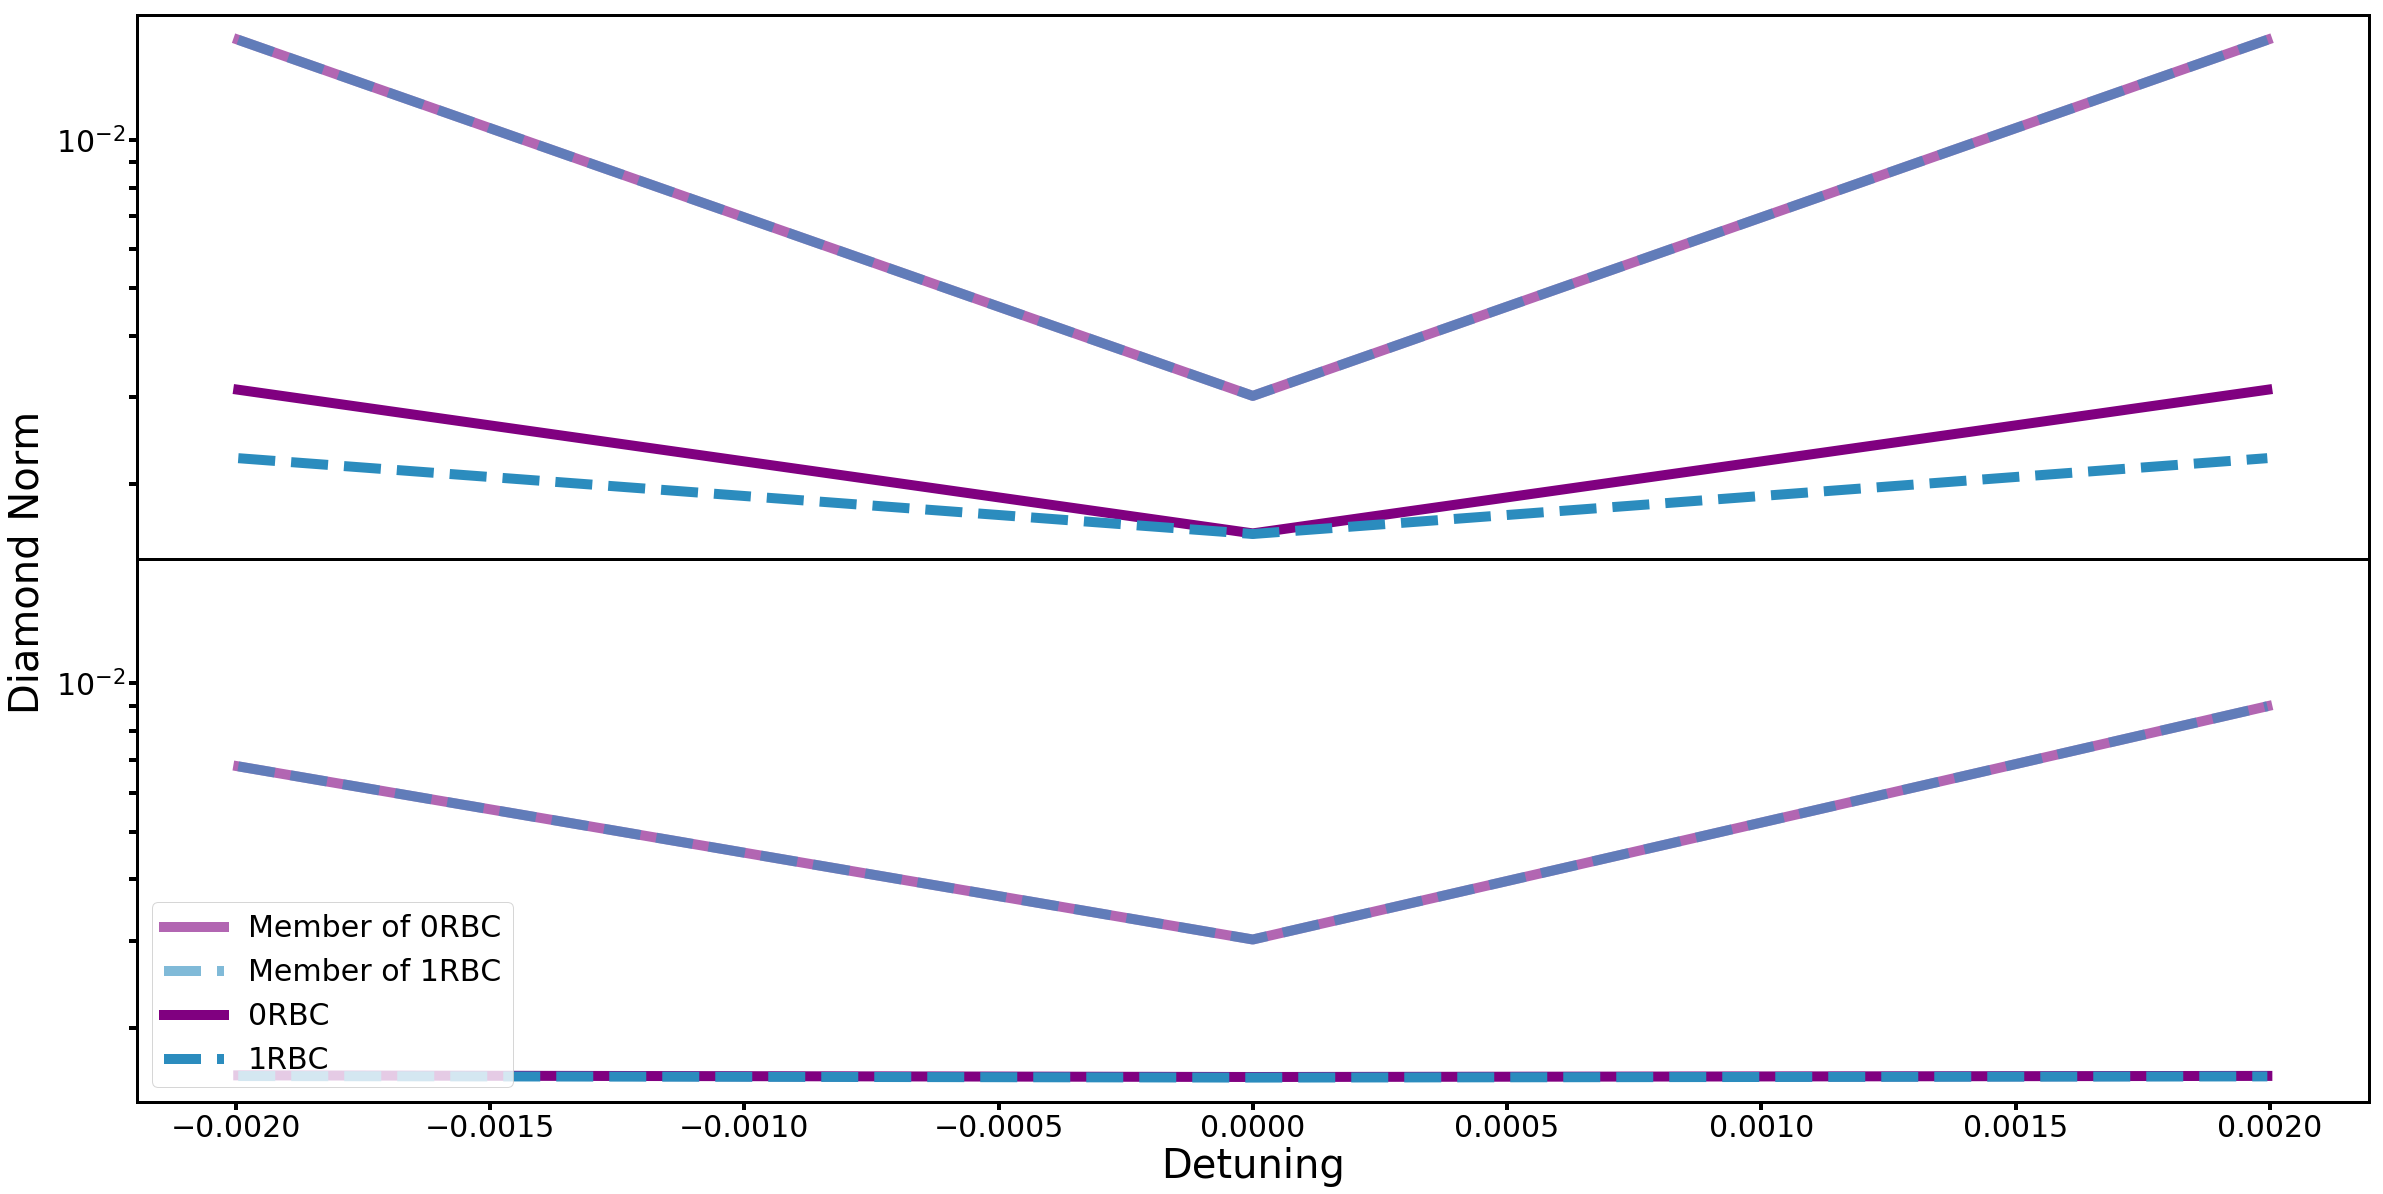

In [89]:
import dill
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.rcParams['axes.linewidth'] = 3

which_parameter = 0
f, axs = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(40, 20))
(ax1, ax2) = axs
for i, which_parameter in enumerate([0, 1, 3, 4]):
    # Qualitatively the same.
    if i in (1, 3):
        continue
    d_norms00 = dill.load(open("d_norms0{}_2_0".format(which_parameter), 'rb'))
    d_norms10 = dill.load(open("d_norms0{}_2_1".format(which_parameter), 'rb'))
    ax = [ax1, None, ax2, None][i]
    for a, b in ((d_norms00, d_norms10),):# (diamond_norms01, diamond_norms11)):
        ax.semilogy(values, np.array(a).T[0], linewidth = 10, alpha=.6, color='purple',
                    label="Member of 0RBC", ls="-");
        ax.semilogy(values, np.array(b).T[0], linewidth = 10, alpha=.6, color='#2b8cbe',
                    label="Member of 1RBC", ls="--")


        ax.semilogy(values, np.array(a).T[-1], linewidth = 10, alpha=1, color='purple', label="0RBC", ls="-");
        ax.semilogy(values,np.array(b).T[-1], linewidth = 10, alpha=1, color='#2b8cbe', label="1RBC", ls="--");
        ax.tick_params(axis = 'both', which = 'major', labelsize = fontsize*3/4)
        ax.tick_params(axis = 'both', which = 'minor', labelsize = fontsize*3/4)
        for which in ['major', 'minor']:
            ax.xaxis.set_tick_params(width=tickwidth, length=tickwidth*2, which=which)
            ax.yaxis.set_tick_params(width=tickwidth, length=tickwidth*2, which=which)

plt.subplots_adjust(wspace=0, hspace=0)
f.text(.08, 0.5, "Diamond Norm", va='center', rotation='vertical', fontsize=fontsize)
plt.xlabel("Detuning", fontsize=fontsize)
plt.legend(prop={'size': 30}, loc=3)        
